#2010년도~2021년 혼인건수와 출생아수의 변화 살펴하기
**시간이 지날수록 출생아수의 변화가 있는가?**

#####1) 혼인건수가 가장 적은 년도와 가장 많은 년도는 언제인가?
#####2) 출생아수가 가장 적은 년도와 가장 많은 년도는 언제인가?
#####3) 출생아수와 혼인건수가 영향이 있는가?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1.2010년도~2021년도 혼인건수와 출생아수  데이터 읽어오기

#####- URL(통계청):https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B8000G
#####- 조회설정
######행정구역별:전국
######종류별:출생아수(명), 혼인건수(건)
######시점: 2000년도~2021년도
######그외:행렬전환


In [2]:
#pandas 라이브러리 가져오기

import pandas as pd

In [3]:
#2000년_2021년 출생아수와 혼인건수.csv 화일 읽고 상위 5개 데이터 확인하기
#변수명 = pd.read_csv(‘파일경로명’, encoding=‘인코딩방식’header=행번호)
#행번호는 [1]로 사용
#인코딩방식 :EUC_KR(한글이 포함된 일반적인 경우)/cp949(MS office에서 저장한 파일 형식)
#header=행번호 : 열이름으로 사용할 행번호 설정

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/6주차/2000년_2021년 출생아수와 혼인건수.csv", encoding="EUC_KR ", header=[1])
data.head()

,시점,출생아수(명),혼인건수(건)
0,2000,640089,332090
1,2001,559934,318407
2,2002,496911,304877
3,2003,495036,302503
4,2004,476958,308598


###2.2010년도~2021년도 혼인건수와 출생아수  데이터 확인하기

In [4]:
#데이터 정보 확인(행열개수, 데이터 타입, 열의 개수 등)하기

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   시점       22 non-null     int64
 1   출생아수(명)  22 non-null     int64
 2   혼인건수(건)  22 non-null     int64
dtypes: int64(3)
memory usage: 656.0 bytes


In [5]:
#수치형 데이터에 대한 통계자료(평균, 최대, 최소등..) 확인하기

data.describe()

,시점,출생아수(명),혼인건수(건)
count,22.000000,22.000000,22.000000
mean,2010.500000,437712.000000,297942.363636
std,6.493587,89917.017497,40377.388552
min,2000.000000,260562.000000,192507.000000
25%,2005.250000,413541.000000,286852.000000
50%,2010.500000,448304.000000,309178.500000
75%,2015.750000,482652.000000,326830.750000
max,2021.000000,640089.000000,343559.000000


In [6]:
#하위 10개 데이터 확인하기

data.tail(10)

,시점,출생아수(명),혼인건수(건)
12,2012,484550,327073
13,2013,436455,322807
14,2014,435435,305507
15,2015,438420,302828
16,2016,406243,281635
17,2017,357771,264455
18,2018,326822,257622
19,2019,302676,239159
20,2020,272337,213502
21,2021,260562,192507


###3.혼인건수와 출생아수 데이터 재정리하기

In [7]:
#열이름 변경하기
#변수명.rename(columns = {‘열이름’:‘새로운 열이름’}, inplace= True)
#출생아수(명)->출생아수
#혼인건수(건)->혼인건수
#상위5개 데이터 확인

data.rename(columns={'출생아수(명)':'출생아수', '혼인건수(건)':'혼인건수' }, inplace=True)
data.head()

,시점,출생아수,혼인건수
0,2000,640089,332090
1,2001,559934,318407
2,2002,496911,304877
3,2003,495036,302503
4,2004,476958,308598


In [8]:
#2010년도~2021년도 데이터 행 찾기

data[10:22]

,시점,출생아수,혼인건수
10,2010,470171,326104
11,2011,471265,329087
12,2012,484550,327073
13,2013,436455,322807
14,2014,435435,305507
15,2015,438420,302828
16,2016,406243,281635
17,2017,357771,264455
18,2018,326822,257622
19,2019,302676,239159


In [9]:
#2010년도~2021년도 데이터 행 저장하기
#저장된 데이터 확인

numData = data[10:22]
numData

,시점,출생아수,혼인건수
10,2010,470171,326104
11,2011,471265,329087
12,2012,484550,327073
13,2013,436455,322807
14,2014,435435,305507
15,2015,438420,302828
16,2016,406243,281635
17,2017,357771,264455
18,2018,326822,257622
19,2019,302676,239159


In [10]:
# 2010년이 10번째 행이으로 index 정리하고 확인하기(상위5개 데이터)
#변수명.reset_index(drop=True, inplace=True)


numData.head(5)

,시점,출생아수,혼인건수
10,2010,470171,326104
11,2011,471265,329087
12,2012,484550,327073
13,2013,436455,322807
14,2014,435435,305507


###4.시각적으로 분석하며 질문에 답하기

####1)한글 지원하기

In [11]:
#차트에 한글 지원하기
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.9 MB/s eta 0:00:00


####2)차트를 생성하기 위한 라이브러리 읽어오기


In [12]:
import matplotlib.pyplot as plt

####3) 혼인건수가 가장 적은 년도와 가장 많은 년도는 언제인가?


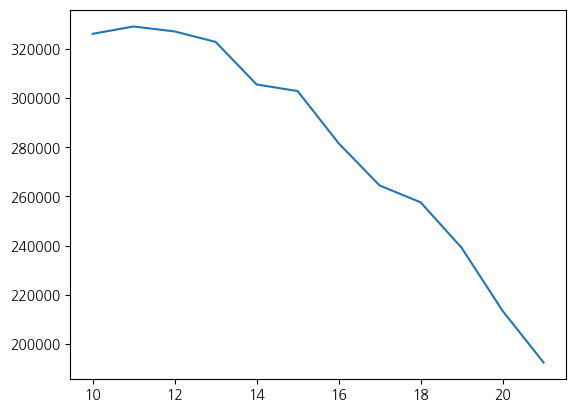

In [13]:
#년도에 따른 '혼인건수'를 plot차트로 생성하기(2010~2021년 데이터 사용)
#plt.plot(y축데이터)
#plt.show()

plt.plot(numData['혼인건수'])
plt.show()

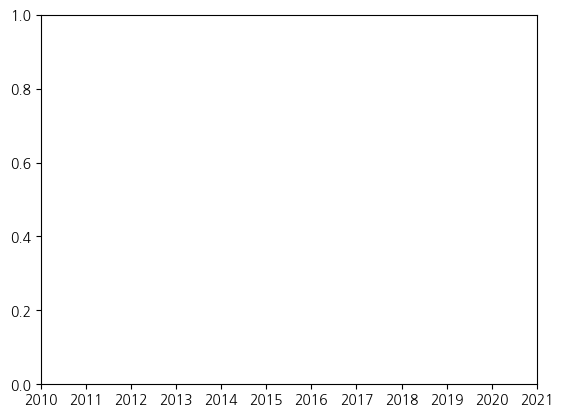

In [14]:
#x축의 눈금값이 모두 나타나도록 차트 수정하기

#plt.xticks(눈금값, 레이블)
#- 눈금값: x, y 축 눈금에 표시할 눈금 수(range())
#- 레이블: 눈금값으로 표시할 레이블로 튜플이나 리스트로 설정


plt.xticks(range(len(numData['시점'])), numData['시점'])
plt.show()

####4) 출생아수가 가장 적은 년도와 가장 많은 년도는 언제인가?


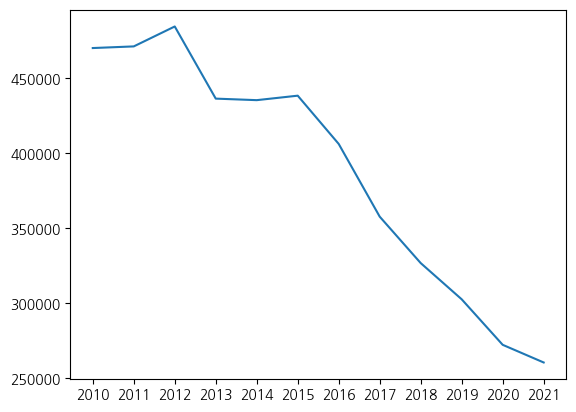

In [ ]:
#년도에 따른 출생아수를 plot차트로 생성하기
#plt.plot(y축데이터)
#y축데이터: 출생아수

#plt.xticks(눈금값, 레이블)
#- 눈금값: x, y 축 눈금에 표시할 눈금 수(range())
#- 레이블: 눈금값으로 표시할 레이블로 튜플이나 리스트로 설정



plt.show()

####5) 출생아수가 혼인건수에 영향이 있는가?

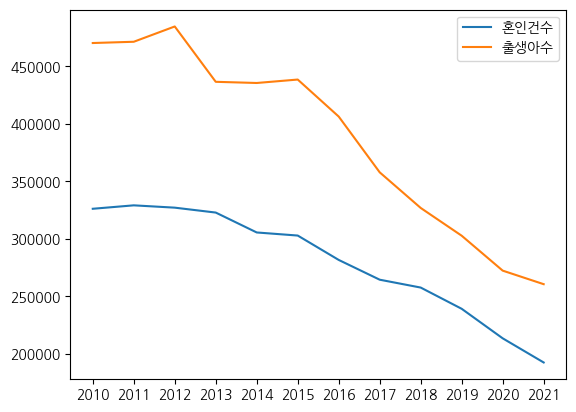

In [ ]:
##년도에 따른 혼인건수와 출생아수를 하나의 plot차트로 생성하기(범례 삽입)
#plt.plot(y축데이터, label='범례이름')
#plt.xticks(눈금값, 레이블)
#- 눈금값: x, y 축 눈금에 표시할 눈금 수(range())
#- 레이블: 눈금값으로 표시할 레이블로 튜플이나 리스트로 설정
#label='범례이름': plot 차트 선의 이름
#plt.legend(): 범례를 차트내에 표시

plt.plot(numData[' '], label=' ')
plt.plot(numData[' '], label=' ')
plt.legend()
plt.xticks( , )
plt.show()

####6) 차트 꾸며보기

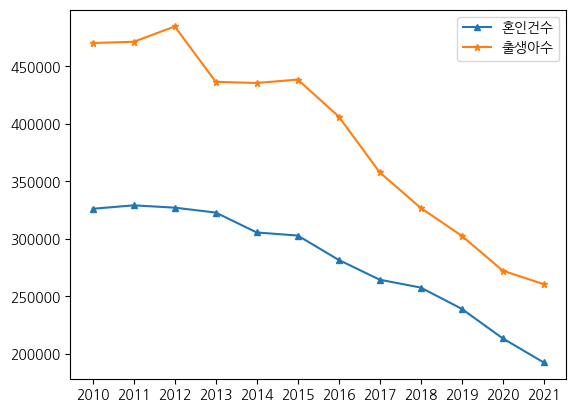

In [ ]:
#모든 차트에 marker 추가하고 '출생아수' 차트의 markersize 조절하기
#marker='마커종류': 선 위에 표현할 마커 모양 설정
#markersize=정수: 마커의 크기 변경

plt.plot(numData['혼인건수'], label="혼인건수", marker="^", markersize=5)
plt.plot(numData['출생아수'], label="출생아수",                         )
plt.legend()
plt.xticks(range(len(numData['시점'])), numData['시점'])
plt.show()

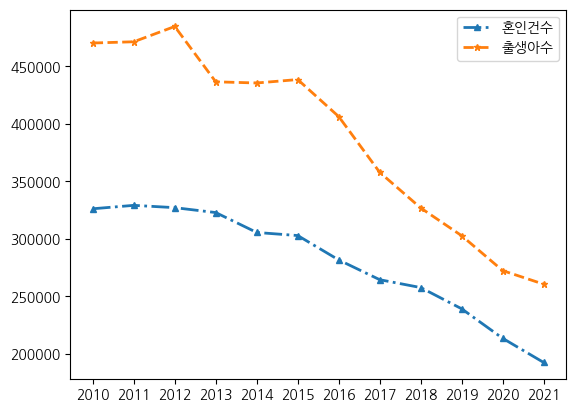

In [ ]:
#모든 차트에 linestyle 추가하고 출생아수 차트의 선두께 조절하기
#linestyle='선종류': 선의 모양 설정
#linewidth=정수: 선 두께 설정

plt.plot(numData['혼인건수'], label="혼인건수", marker="^", markersize=5, linestyle="-.", linewidth=2)
plt.plot(numData['출생아수'], label="출생아수", marker="*", markersize=5, )
plt.legend()
plt.xticks(range(len(numData['시점'])), numData['시점'])
plt.show()

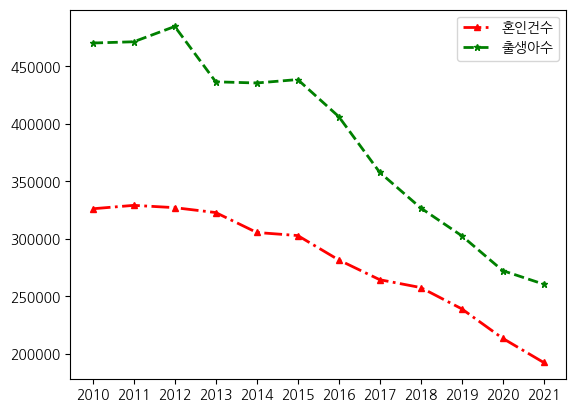

In [ ]:
#차트 색상 변경하기
#color='색상': 선 색상 설정

plt.plot(numData['혼인건수'], label="혼인건수", marker="^", markersize=5, linestyle="-.", linewidth=2, color="red")
plt.plot(numData['출생아수'], label="출생아수", marker="*", markersize=5, linestyle="--", )
plt.legend()
plt.xticks(range(len(numData['시점'])), numData['시점'])
plt.show()

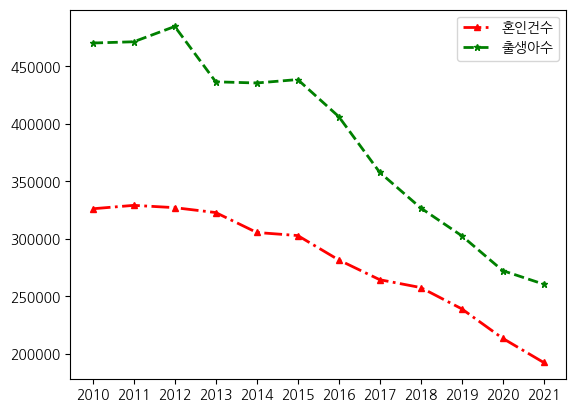

In [ ]:
#혼인건수 차트의 색상, 마커, 선종류를 약식으로 표현해보기
#'ro:' : color='r', marker='o', linestyle='-'

plt.plot(numData['혼인건수'], 'r^-.', label="혼인건수", markersize=5, linewidth=2)
plt.plot(numData['출생아수'],       , label="출생아수", markersize=5, linewidth=2)
plt.legend()
plt.xticks(range(len(numData['시점'])), numData['시점'])
plt.show()

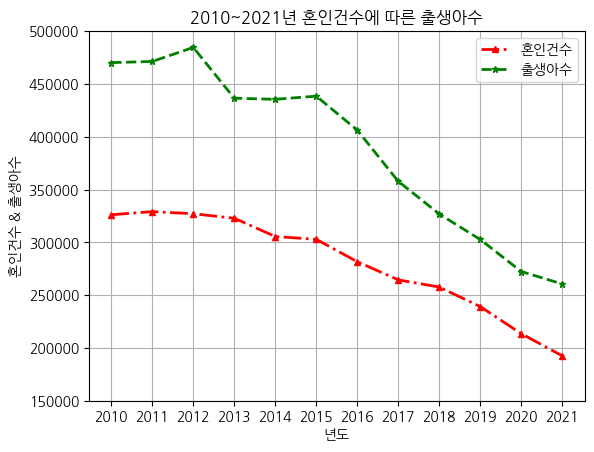

In [ ]:
#차트제목, XY 레이블, grid 지정해보기
#plt.title('차트제목') :지정한 차트제목을 차트 중앙 상단에 표시
#plt.xlabel('x축제목'), plt.ylabel('y축제목') : x축과 y축의 제목을 지정한 문자열로 설정
#plt.ylim(처음값, 마지막값)
#plt.grid() : 차트내에 눈금선 표시

plt.plot(numData['혼인건수'], 'r^-.', label="혼인건수", markersize=5, linewidth=2)
plt.plot(numData['출생아수'], 'g*--', label="출생아수", markersize=5, linewidth=2)
plt.legend()
plt.xticks(range(len(numData['시점'])), numData['시점'])
plt.title(' ')
plt.xlabel(' ')
plt.ylabel(' ')
plt.ylim(       ,       )

plt.show()